# Visualization 2

In [1]:
import pandas as pd 
import numpy as np

In [2]:
# Read data from fire arm laws by state
df=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/lawsstate.csv')
#http://www.statefirearmlaws.org/national-data/2016

In [3]:
# for Year 2016
def show_laws(year):
   x = df[df['year'] == year].reset_index(drop = True)
   x = x.sort_values(by = 'lawtotal', ascending = False)
   return x


In [4]:
# Type in the year for data you want
df1 = show_laws(2016)

In [5]:
# only need the last column with total laws
df2 = df1.iloc[:,[0,-1]]

In [6]:
# sort values by state & show head
df3 = df2.sort_values(by=['state'])
df3.head(2)

,state,lawtotal
0,Alabama,10
1,Alaska,3


### 2nd file - Gun death per 100K residents by state for 2016

In [7]:
# Read data
Gunrate=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/yr2016firearmdeathrate.csv')
#https://www.kff.org/other/state-indicator/firearms-death-rate-per-100000/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

In [8]:
# drop unwanted rows
Gunrate = Gunrate.loc[1:51:]

In [9]:
# Rename the column
cols=['state','rate']
Gunrate.columns=cols
Gunrate.head(3)

,state,rate
1,Alabama,21.5
2,Alaska,23.3
3,Arizona,15.2


In [10]:
# reset index and drop unwanted column
Gunrate.reset_index(inplace=True)
Gunrate.drop(['index'],axis=1,inplace=True)

In [11]:
Gunrate.sort_values(by=['state'])
Gunrate.head(3)

,state,rate
0,Alabama,21.5
1,Alaska,23.3
2,Arizona,15.2


### Get State abbreviations

In [12]:
# Read state abbreviations from excel file
stateabbr=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/Abbr.csv')

In [13]:
stateabbr.sort_values(by=['state'])
stateabbr.head(2)

,state,abbr,Unnamed: 2,Unnamed: 3
0,Alabama,AL,NaN,NaN
1,Alaska,AK,NaN,NaN


### concat data frames into one

In [14]:
# Concat all the dataframes into one
total=pd.concat([df3,Gunrate])

C:\Users\MarvinHP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [15]:
#group by state 
statelaw_rate = total.groupby('state')['lawtotal','rate',].max()

In [16]:
# get rid of NA
statelaw_rate['rate'] = statelaw_rate.rate.fillna(0)

In [17]:
# get rid of NA
statelaw_rate['lawtotal'] = statelaw_rate.lawtotal.fillna(0)

In [18]:
# reset index
statelaw_rate.reset_index(inplace=True)

In [19]:
# sort by state
statelaw_rate.sort_values(by=['state']).head(2)

,state,lawtotal,rate
0,Alabama,10.0,21.5
1,Alaska,3.0,23.3


### create graph

In [20]:
# list of state abbreviations 
my_list = stateabbr.abbr.values

In [21]:
x = statelaw_rate.lawtotal

In [22]:
y = statelaw_rate.rate

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)

Text(0.5, 1.0, 'Gun Laws vs. Gun Deaths')

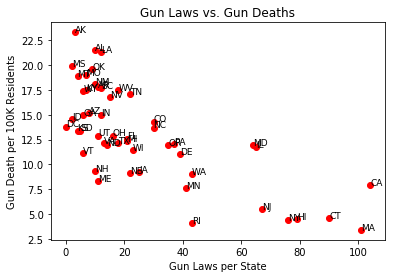

In [24]:
# MY GRAPH NEEDS X AXIS LAWS Y AXIS GUN DEATHS
Y = y
X = x
n = my_list


fig, ax = plt.subplots()
ax.scatter(X, Y, color='red')
for i, txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]), fontsize=9 )
    
plt.xlabel('Gun Laws per State')
plt.ylabel('Gun Death per 100K Residents')
plt.title('Gun Laws vs. Gun Deaths')
